In [1]:
from keras.models import load_model
import data
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import matplotlib
import numpy as np
%matplotlib inline  

In [9]:
batch_size = 16
num_classes = 3

X,y  = data.read_dataset_from_pkl()
X_train,X_val,X_test = X['train'].astype('float32')/255,X['val'].astype('float32')/255,X['test'].astype('float32')/255
y_train,y_val,y_test = y['train'],y['val'],y['test']

model = load_model('./save/final_model.hdf5')

exp_test = X_test[0:batch_size]
y_pred = model.predict(exp_test, batch_size=batch_size)

conv_a = K.function([model.layers[0].input,K.learning_phase()], # if use dropout must use learning phase and set  mode
                                  [model.get_layer('conv1_a').output])([exp_test,0])[0]

f1_a = K.function([model.layers[0].input,K.learning_phase()],
                                  [model.get_layer('dense1_a').output ])([exp_test,0])[0]




print('type of  model.layers[0].input')
print(type(model.layers[0].input))

print('type of  model.get_layer(conv1_a).output')
print(type(model.get_layer('conv1_a').output)) # by this way we can get tensorflow tensor



print('type of conv1')
print(type(conv_a))

print('shape of conv activation')
print(conv_a.shape)
print('shape of fl_a')
print(f1_a.shape)

print('conv activation')
#print(conv_a)
print('- - '*50)
print('f1')
print(f1_a)

type of  model.layers[0].input
<class 'tensorflow.python.framework.ops.Tensor'>
type of  model.get_layer(conv1_a).output
<class 'tensorflow.python.framework.ops.Tensor'>
type of conv1
<class 'numpy.ndarray'>
shape of conv activation
(16, 128, 128, 16)
shape of fl_a
(16, 10)
conv activation
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
f1
[[    0.             0.             0.             0.             0.
   1424.4909668      0.             0.             0.             0.        ]
 [    0.             0.             0.             0.             0.
   1331.87182617     0.             0.             0.             0.        ]
 [    0.             0.             0.             0.             0.
    759.1427002      0.             0.             0.             0.        ]
 [    0.             0.             0.             0.           

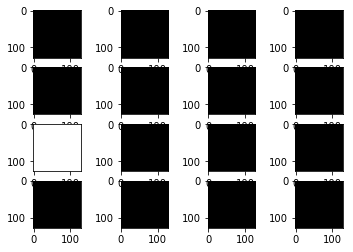

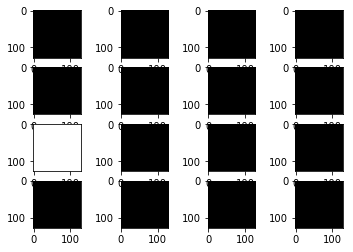

In [14]:
import numpy.random as rnd
def show_conva(pic_index,conv_a):
	#f, axarr = plt.subplots(4,4)
	conv_a = conv_a[pic_index]
	for i in range(16):
		i1 = i//4 #integer divide
		i2 = i%4
		#axarr[i1,i2].plot(conv_a[:,:,i])  
		#axarr[i1,i2].imshow(conv_a[:,:,i], cmap = plt.get_cmap('gray'),vmin=0.0, vmax=1.0)
		plt.subplot(4, 4, i+1)
		plt.imshow(conv_a[:,:,i], cmap = plt.get_cmap('gray'),vmin=0.0, vmax=1.0)
		#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
		#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
	plt.show()

show_conva(0,conv_a)
show_conva(1,conv_a)

In [23]:
5//4

1